<a href="https://colab.research.google.com/github/Amir-Fasil/Clustering/blob/main/DBSCAN_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


In [7]:
def dbscan_clustering():
    iris = load_iris()
    X = iris.data
    y_true = iris.target

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    Eps = 0.5
    MinPts = 5

    dbscan = DBSCAN(eps=Eps, min_samples=MinPts)
    y_dbscan = dbscan.fit_predict(X_scaled)


    if len(set(y_dbscan)) > 1:
        silhouette_avg = silhouette_score(X_scaled[y_dbscan != -1], y_dbscan[y_dbscan != -1])
        print(f"Silhouette Score: {silhouette_avg:.3f}")
    else:
      # if all the data points are outliers
        print("Silhouette Score cannot be computed as all data points are in one cluster or marked as noise.")

    # Visualize Clusters (Using PCA for 2D Visualization)
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, cmap='viridis', marker='o', label="Clustered Data")
    plt.title("DBSCAN Clustering on Iris Dataset")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label="Cluster Label")
    plt.show()

    print("Cluster Labels:", np.unique(y_dbscan))


Silhouette Score: 0.656


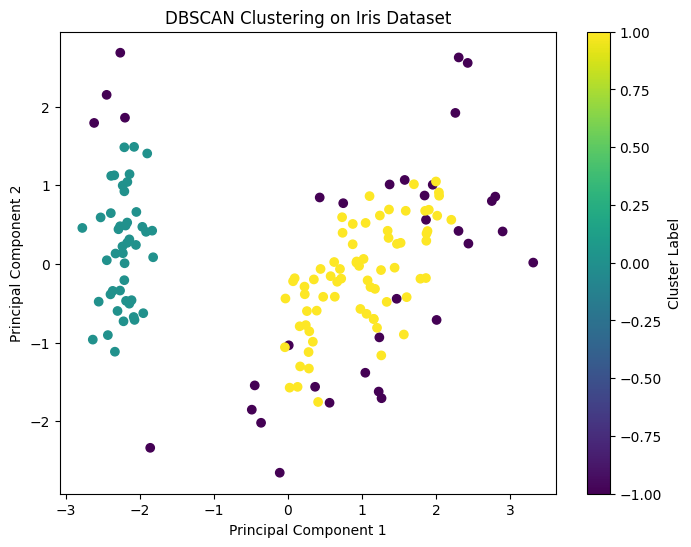

Cluster Labels: [-1  0  1]


In [8]:
dbscan_clustering()